<a href="https://colab.research.google.com/github/krishnadixit05/Google-Colab/blob/main/Post_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Lab - 9 Kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#Loading the dataset
df1 = pd.read_csv("/content/forestfires.csv",header =0)
df1


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df1.shape

(517, 13)

In [ ]:
df1.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df2=df1[['DC','FFMC']]

In [ ]:
#centroid of the clusters -> number of the clusters
#define numbers = 3

import random
init_centroid=random.sample(range(0,len(df2)),3)
init_centroid

[218, 507, 157]

In [ ]:
#identified our centroids to the clusters
centroids=[]
for i in init_centroid:
  centroids.append(df2.iloc[i])

In [ ]:
centroids

[DC      699.6
 FFMC     92.9
 Name: 218, dtype: float64,
 DC      752.6
 FFMC     91.0
 Name: 507, dtype: float64,
 DC      654.1
 FFMC     92.1
 Name: 157, dtype: float64]

In [ ]:
centroids = np.array(centroids)
centroids


array([[699.6,  92.9],
       [752.6,  91. ],
       [654.1,  92.1]])

In [ ]:
X = np.array(df2)

In [ ]:
def calc_distance(i,j):
  return(sum((i-j)**2))**0.5

In [ ]:
#for any given datapoint, find out the nearest centroid
def findnearestcentroid(centroids,X):
  assignedcluster=[]
  for i in X:
    dist=[]
    for j in centroids:
      dist.append(calc_distance(i, j))
    assignedcluster.append(np.argmin(dist))
  return assignedcluster

In [ ]:
get_centroid=findnearestcentroid(centroids,X)
get_centroid

[2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,


In [ ]:
#getting the new centroid
def calculating_centroid(cluster_number,X):
  new_centroid=[]
  new_df=pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)
  for c in set(new_df['cluster']):   #c->0,1,2
    current_cluster=new_df[new_df['cluster']==c][new_df.columns[:-1]]
    cluster_mean=current_cluster.mean(axis=0)
    new_centroid.append(cluster_mean)
  return new_centroid

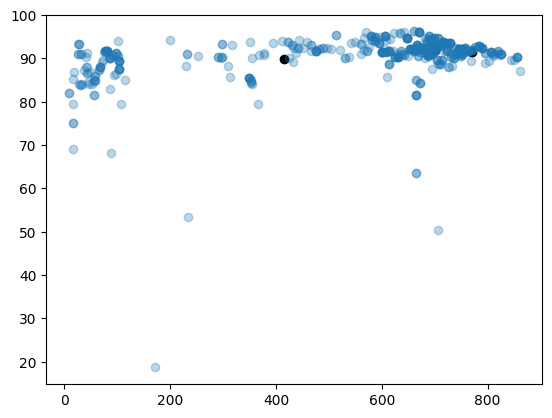

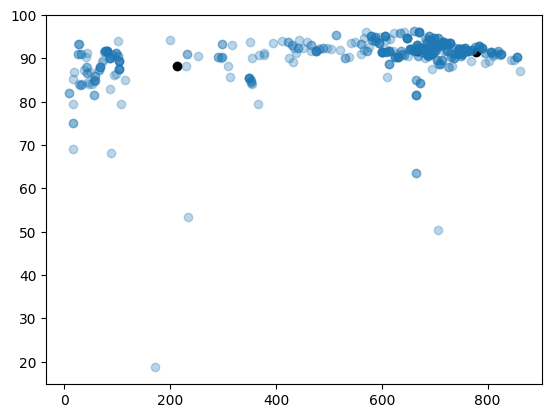

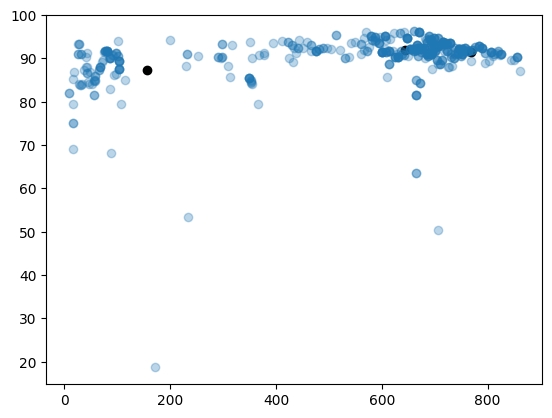

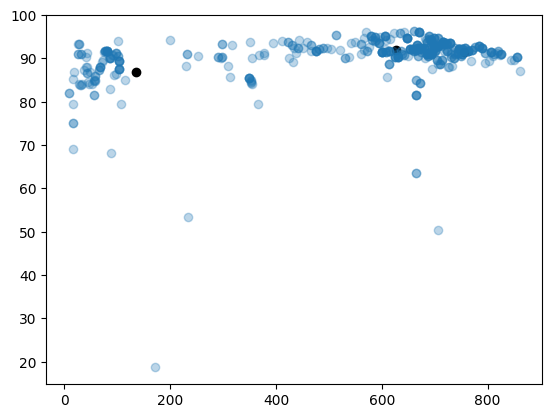

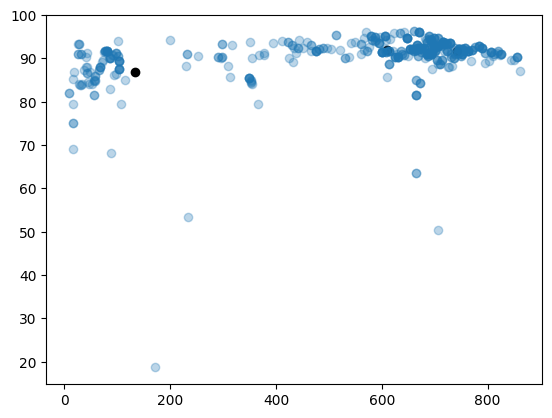

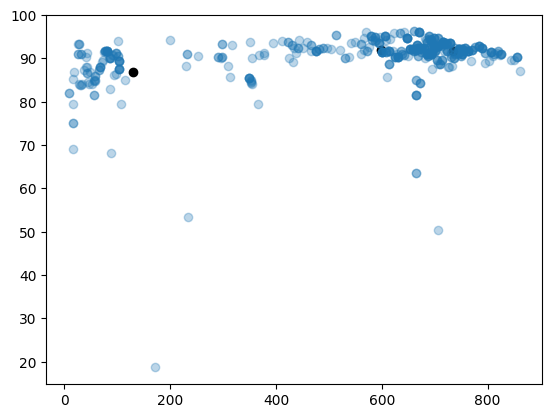

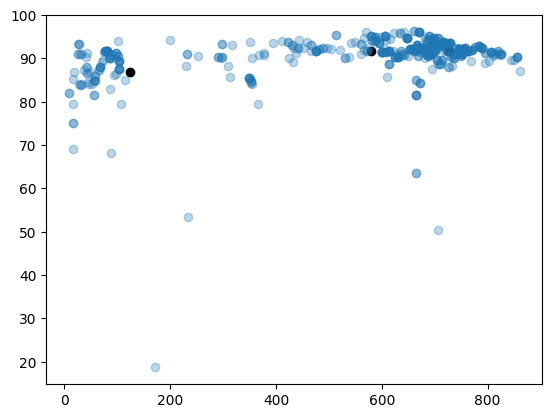

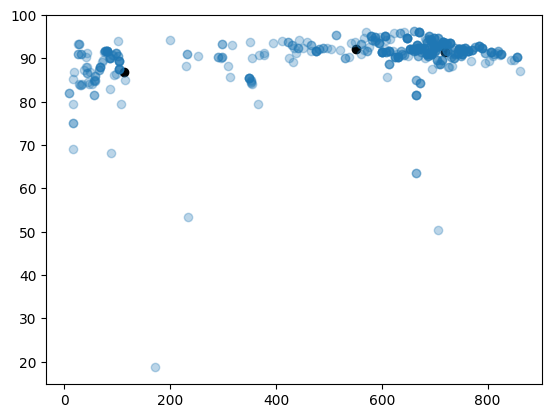

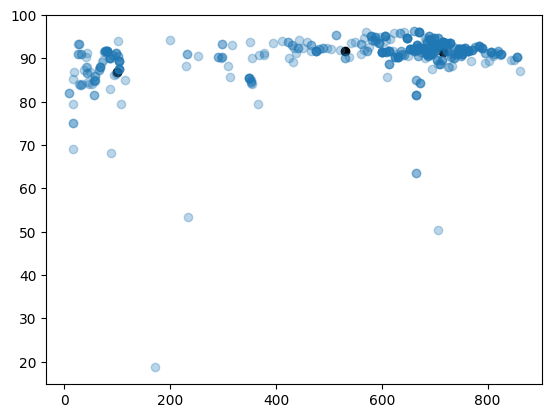

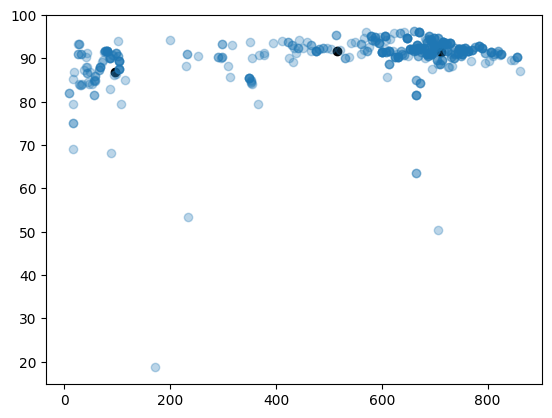

In [ ]:
epochs=10
for i in range(epochs):
  get_centroid=findnearestcentroid(centroids, X) #Fixed the typo in the function name
  centroids=calculating_centroid(get_centroid,X)
  plt.figure()
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black')#plotting the centroid points
  plt.scatter(X[:,0],X[:,1],alpha=0.3) #plotting the observation points
  plt.show()